In [1]:
import pandas as pd 
from fbprophet import Prophet
import matplotlib.pyplot as plt

In [52]:
df = pd.read_excel(r'H:\财务分析\BLBL\vscode绘图\income.xlsx')
df['ds']=pd.to_datetime(df['ds'])
df['cap']=6400
model=Prophet(growth='logistic',
              yearly_seasonality=10,

              )
# model=Prophet(
#     growth='linear',
#     seasonality_mode='additive',
#     daily_seasonality = True,
#     weekly_seasonality=3
#                             )#logistic linear
model.fit(df) 
future = model.make_future_dataframe(periods=13, freq='Q')
future['cap']=6400
future['floor']=0
forecast = model.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


In [56]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
16,2022-03-31,6762.978131,6700.464013,6825.536997
17,2022-06-30,6177.462476,6112.038974,6244.517635
18,2022-09-30,6495.842122,6433.736824,6563.949069
19,2022-12-31,6859.125801,6792.865080,6917.055090
20,2023-03-31,7076.026152,7009.884634,7147.520958
21,2023-06-30,6939.395055,6877.245444,7006.260968
22,2023-09-30,7089.690960,7017.909484,7149.185411
23,2023-12-31,7240.860773,7176.824063,7301.478301
24,2024-03-31,9587.260254,9521.487242,9653.642835
25,2024-06-30,6953.128267,6885.724699,7018.956729


In [47]:
# type(forecast)

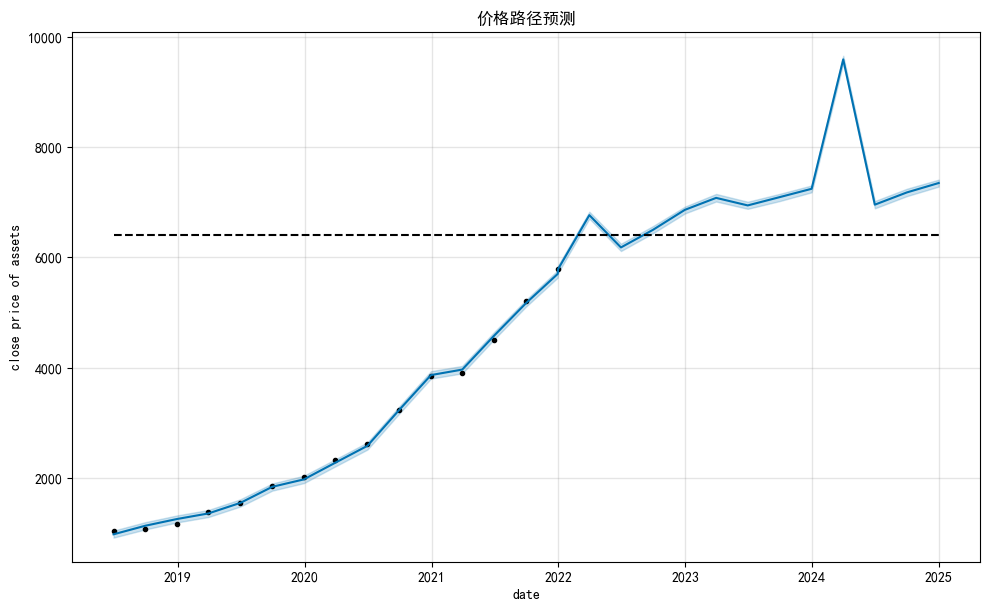

In [57]:
model.plot(forecast)
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.title('价格路径预测')
plt.xlabel('date')
plt.ylabel('close price of assets')
plt.show()

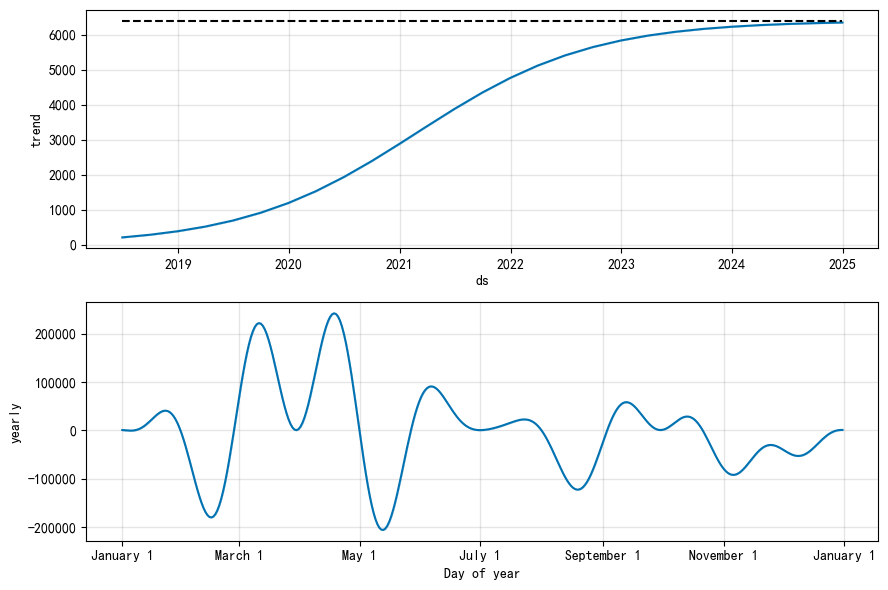

In [58]:
model.plot_components(forecast)
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.show()

In [60]:
forecast.to_excel(r'H:\财务分析\BLBL\vscode绘图\forcast\income_f.xlsx',sheet_name='sheet1')